In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.graph_objects as go
import plotly.express as px


In [2]:
data = pd.read_csv("data2601.csv", sep=';')

In [8]:
data.describe()

,X.1,X,year,contig,comlang_off,rta,destTotImp
count,48518.000000,48518.000000,48518.000000,48518.000000,48518.000000,48518.000000,4.851800e+04
mean,37859.157653,47501.842347,2011.020714,0.031844,0.168845,0.326003,3.788410e+09
std,22730.480278,28948.210955,2.533475,0.175586,0.374618,0.468753,9.214435e+09
min,0.000000,7.000000,2007.000000,0.000000,0.000000,0.000000,2.666950e+05
25%,17977.250000,22186.250000,2009.000000,0.000000,0.000000,0.000000,1.497847e+08
50%,37240.000000,46222.000000,2011.000000,0.000000,0.000000,0.000000,4.942013e+08
75%,57414.750000,72077.750000,2013.000000,0.000000,0.000000,1.000000,2.332118e+09
max,78318.000000,100423.000000,2015.000000,1.000000,1.000000,1.000000,8.601413e+10


In [13]:
data['dist'] = data['dist'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [20]:
data['gdp_o'] = data['gdp_o'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [21]:
data['gdp_d'] = data['gdp_d'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [22]:
data['tr_flows'] = data['tr_flows'].apply(lambda row: row.replace(',','.') if (',' in row) else row)

In [23]:
data['gdp_o'] = pd.to_numeric(data['gdp_o'], downcast="float")

In [24]:
data['gdp_d'] = pd.to_numeric(data['gdp_d'], downcast="float")

In [25]:
data['tr_flows'] = pd.to_numeric(data['tr_flows'], downcast="float")

In [44]:
data.describe()

,X.1,X,year,contig,dist,comlang_off,gdp_o,gdp_d,rta,destTotImp,tr_flows
count,48518.000000,48518.000000,48518.000000,48518.000000,48518.000000,48518.000000,4.851800e+04,4.851800e+04,48518.000000,4.851800e+04,48518.0
mean,37859.157653,47501.842347,2011.020714,0.031844,6782.147461,0.168845,1.042732e+09,5.429463e+08,0.326003,3.788410e+09,3395394.0
std,22730.480278,28948.210955,2.533475,0.175586,4540.620117,0.374618,2.307478e+09,1.726169e+09,0.468753,9.214435e+09,5862234.5
min,0.000000,7.000000,2007.000000,0.000000,59.617001,0.000000,3.185223e+05,1.230051e+05,0.000000,2.666950e+05,1.0
25%,17977.250000,22186.250000,2009.000000,0.000000,2742.321045,0.000000,9.752538e+07,1.444068e+07,0.000000,1.497847e+08,69975.5
50%,37240.000000,46222.000000,2011.000000,0.000000,6442.977539,0.000000,2.895484e+08,5.534800e+07,0.000000,4.942013e+08,609556.5
75%,57414.750000,72077.750000,2013.000000,0.000000,9656.951172,0.000000,9.262833e+08,3.189079e+08,1.000000,2.332118e+09,3757539.5
max,78318.000000,100423.000000,2015.000000,1.000000,19812.042969,1.000000,1.803665e+10,1.803665e+10,1.000000,8.601413e+10,28845252.0


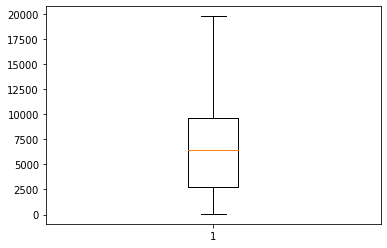

In [18]:
#plt.ylim(0,10)
plt.boxplot(data['dist'])
plt.show()

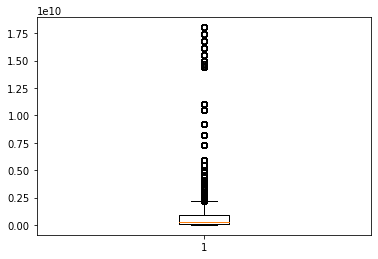

In [26]:
#plt.ylim(0,10)
plt.boxplot(data['gdp_o'])
plt.show()

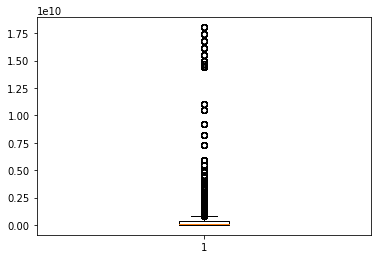

In [27]:
#plt.ylim(0,10)
plt.boxplot(data['gdp_d'])
plt.show()

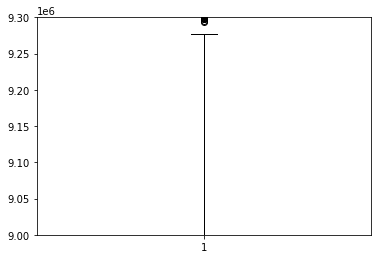

In [37]:
plt.ylim(9000000,9300000)
plt.boxplot(data['tr_flows'])
plt.show()

In [38]:
data_no_outliers_tr_flows = data[data['tr_flows'] < 9250000]

In [42]:
data_with_outliers_tr_flows = data[data['tr_flows'] >= 9250000]

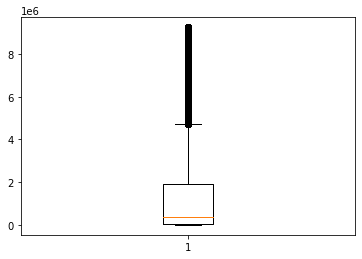

In [40]:
#plt.ylim(9000000,9300000)
plt.boxplot(data_no_outliers_tr_flows['tr_flows'])
plt.show()

In [41]:
data_no_outliers_tr_flows[['iso3_o','iso3_d']].value_counts()

iso3_o  iso3_d
GRC     CHL       9
NLD     ISL       9
HKG     THA       9
NLD     GUY       9
HKG     TTO       9
                 ..
DNK     TUN       1
ISR     CHN       1
PAN     PER       1
ISR     CZE       1
NOR     FIN       1
Length: 5575, dtype: int64

In [43]:
data_with_outliers_tr_flows[['iso3_o','iso3_d']].value_counts()

iso3_o  iso3_d
FIN     POL       9
SVN     BLR       9
FIN     NOR       9
ITA     JOR       9
FIN     KOR       9
                 ..
IND     BLR       1
NOR     IRL       1
CHE     GTM       1
SVK     DEU       1
DEU     PER       1
Length: 1565, dtype: int64

In [4]:
data_iso = data[['iso3_o','iso3_d']].value_counts()

In [25]:
data_iso.to_csv('data_iso.csv')

In [20]:
data_iso.drop_duplicates(inplace=True)

<ipython-input-20-663e2fb2c71d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_iso.drop_duplicates(inplace=True)


In [30]:
data_iso_o = data['iso3_o']

In [32]:
data_iso_d = data['iso3_d']

In [33]:
df = pd.concat([data_iso_o, data_iso_d], axis = 0)

In [35]:
df.drop_duplicates(inplace=True)

In [38]:
df.to_csv('unique_iso.csv')

In [47]:
df2 = df.reset_index()

In [50]:
df2.drop('index',axis=1,inplace=True)

In [51]:
df2

,0
0,ALB
1,DZA
2,AND
3,AGO
4,AZE
...,...
149,STP
150,KNA
151,LCA
152,AFG


In [52]:
df2.to_csv('unique_iso.csv')